In [7]:
from tkinter import*
from tkinter import ttk
from tkinter.filedialog import askopenfile
import time
from tkinter import filedialog

top = Tk()
top.rowconfigure(0, weight=1)
top.columnconfigure(0, weight=1)
top.state('zoomed')

page1 = Frame(top)
page2 = Frame(top)

for frame in (page1, page2):
    frame.grid(row=0, column=0, sticky='nsew')


def show_frame(frame):
    frame.tkraise()

show_frame(page1)
x1= []
y= []


#================pagr1================
page1.config(background="azure")
#--------------label------------------
page1_label4 = Label(page1, text="enter the name of project", font=('Arial', 15, 'bold'))
page1_label4.place(x=10, y=100)

page1_label3 = Label(page1, text="enter the maximum fund", font=('Arial', 15, 'bold'))
page1_label3.place(x=10, y=150)

page1_label = Label(page1, text="enter the cost ", font=('Arial', 15, 'bold'))
page1_label.place(x=10, y=200)



page1_label2 = Label(page1, text="enter the profit gained ", font=('Arial', 15, 'bold'))
page1_label2.place(x=10, y=250)

page1_button1= Button(page1, text='Solve', font=('Arial', 45, 'bold'), command=lambda: show_frame(page2))
page1_button1.place(x=450, y=500)

page1_entry2= Entry(page1)
capacity_from_user=[]
name_project=[]
#================Buttonss on page1=======================
# -------------get value-----------------
def Get_MyInputValue():
    page1_label = MyEntryBox.get()
    x1.append(int(page1_label))
    page1_label2 = MyEntryBox1.get()
    y.append(int(page1_label2))
    capacity_from_user .append(int(MyEntryBox3.get()))
    page1_label4 = MyEntryBox4.get()
    name_project.append(page1_label4)
    

MyEntryBox = Entry(top, width=23)
MyEntryBox.place(x=300, y=200)
MyEntryBox1 = Entry(top, width=23)
MyEntryBox1.place(x=300, y=250)
MyEntryBox3 = Entry(top, width=23)
MyEntryBox3.place(x=300, y=150)
MyEntryBox4 = Entry(top, width=23)
MyEntryBox4.place(x=300, y=100)

#--------------delete--------------------
def delete():
    MyEntryBox .delete(0)
    MyEntryBox1 .delete(0)
    MyEntryBox4. delete(0)

mybutton = Button(page1, text='Delete', font=('Arial', 15, 'bold'), command=delete)
mybutton.grid(row = 70, column = 70,padx = 70, pady = 70)
mybutton.place(x=350, y=400)
save = Button(page1, text='Save', font=('Arial', 15, 'bold'), command= Get_MyInputValue)
save.place(x=450, y=400)

# ---------------------upload file----------------
def file_opener():
    input = filedialog.askopenfile(initialdir="/")
    print(input)
    for i in input:
        print(i)
# Button label
file = Button(page1, text='Select a .csv file', font=('Arial', 15, 'bold'), command = lambda:file_opener())
file.place(x=550,y=400)
#file.grid()

#====================dropdown list=====================
list1 = ["Marketing", "Fashion Designing", "Technology", "Other"]
l4 = Label(top, text="Enter market of inerest", font=('Arial', 15, 'bold'))
l4.place(x=10, y=300)
x = ttk.Combobox(top, value=list1, width=25)
x.place(x=301, y=300)
x.current(0)



top.mainloop()

# Algos that find knapsack solutions

### Greedy Algorithm

It is well known that Greedy best-first search expands nodes with minimal h(n). So, It is not optimal.


The greedy algorithm chooses its best-Path according to 1-D value. This means that its heuristics are whether the values or the weights. In our project we choosed the value-based heuristics.

So the steps of the implemented algo are:

    1- getting all values as the heuristics
    2- choosing the max values for all time
    3- calculating the greedy's solution
Which is not good to use it in critical calculations as investments 

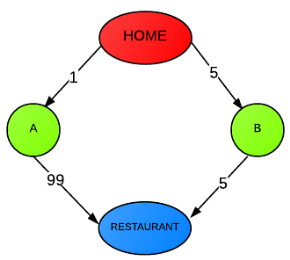

In [8]:
def greedy_search():
    
    global capacity
    global greedy_search_heuristics
    global knapsack_values
    global knapsack_weight
    global value_weight_dict

#adding values and weights entered by the user that we are going to use in our algo        
    for i in range(len(x1)):
        value_weight_dict[y[i]]=x1[i]
    
#     looping to collect our suitable values
    for i in range(len(value_weight_dict)):
        
#         checking for the capacity if it equals zero then PROBLEM IS SOLVED!!
        if (capacity==0):
            return

#         getting the maximum values only from our dict 
#          since the most important thing as greedy algo that we gain the maximum value 
        print(value_weight_dict.keys())
        maximum = max(value_weight_dict.keys())
    
#     checking that weight doesn't exceed the capacity 
        if value_weight_dict[maximum]<=capacity:
            
#             by checking that the weight doesn't exceed the capacity we append our value and weight in a list to be used later
            knapsack_values.append(maximum)
            knapsack_weight.append(value_weight_dict[maximum])
            
#             then we print our capacity to trace our code
#               after that we remove the weight choosen from our capacity and from the value_weight dict

            print("Capacity = ", capacity)
            capacity-= value_weight_dict[maximum] 
            value_weight_dict.pop(maximum)
            
#         or else if the weight exceeds the capacity we ignore it and continue
        else:
            value_weight_dict.pop(maximum)
            continue
            
#         checking if the capacity is greater than zero and we have no more value weights that satisfy the remaining capacity
    if (capacity>0):
        print("\nNO SOLUTION\n")
        return

#     first we define global variables 
capacity = capacity_from_user[0]
greedy_search_heuristics={}
knapsack_values=[]
knapsack_weight=[]
value_weight_dict={}
    
# then we call our function and print all collected data

greedy_search()
print()
print("Last Capacity = ", capacity)   
print()

print(knapsack_values)
print(knapsack_weight)
print()

print(sum(knapsack_values))

# 1 1 1 1 0 1 0 0 0 0
# 92 57 49 68  43 

# And since the greedy looks only for the gained values but not weights 
#  the value/weight choosn are not the optimum ones at all

dict_keys([5])
Capacity =  999

NO SOLUTION


Last Capacity =  997

[5]
[2]

5


### A* Algorithm

It is well known that A∗ search expands nodes with minimal:

#### f(n) = g(n) + h(n)

A∗ is complete and optimal, provided that h(n) is admissible (for TREE-SEARCH) or consistent (for
GRAPH-SEARCH).

The A* algorithm chooses its best-Path according to 2-D values. This means that its heuristics are both the values and the weights. In our project we choosed the Ratio-based heuristics as it will be the unique thing to choose.

So the steps of the implemented algo are:

    1- getting all values and weights in the form of RATIOs as the heuristics
    2- choosing the max Ratios for all time
    3- calculating the A*'s optimum solution
Which is suitable to use it in critical calculations as investments 


<div>
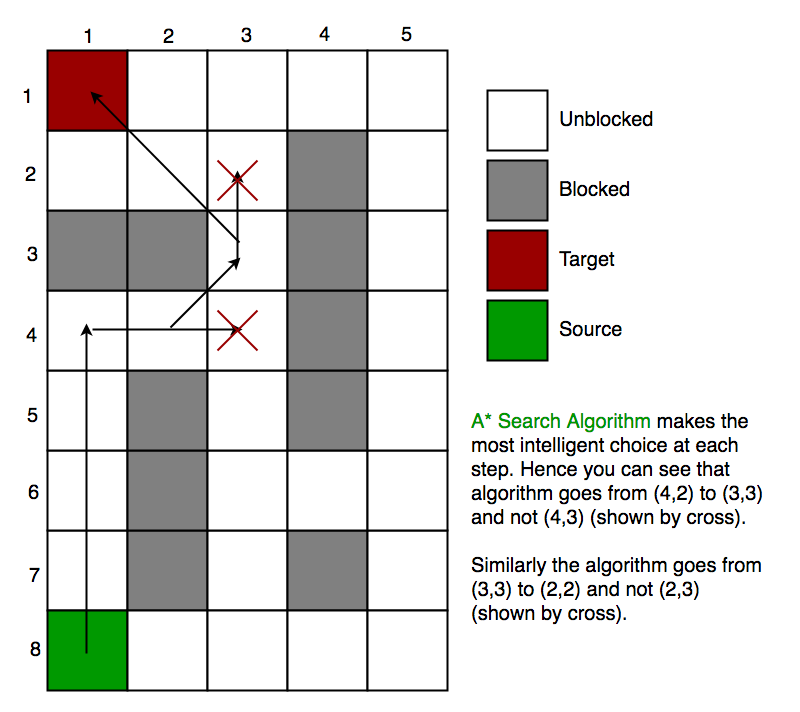
</div>

In [9]:
def AStar_search():

#     first we define our variables 
    global capacity
    global AStar_search_heuristics
    global knapsack_values
    global knapsack_weight
    global value_weight_dict
    
#adding values and weights entered by the user that we are going to use in our algo
    for i in range(len(x1)):
        value_weight_dict[y[i]]=x1[i]
        
    
#     in the A* algo it is totally different. it doesn't choose the max value only or the lowest wieght only
#         first it calcuates a ratio between value/weight then it choose the max RATIO since the max RATIO will result from 
#            the MAX Value Divided by the LOWEST weight


#    looping in the dict to get the ratio then store it in another dict with the format: Ratio:[value,weight]
#         so when we get the max RATIO we can access the value and weight resulted in that ratio
    for i in value_weight_dict:
    
        ratio = i/value_weight_dict[i]
        AStar_search_heuristics[ratio]=[i,value_weight_dict[i]]
        
        
#     looping to collect our suitable values
    for i in range(len(AStar_search_heuristics)):
        
#         checking for the capacity if it equals zero then PROBLEM IS SOLVED!!
        if (capacity==0):
            return
        
#          getting the max RATIO 
        maximum= max(AStar_search_heuristics.keys())
        
#         checking that the max Ratio's wieght is less than the current capacity
#             and also checking that the value is not choosen yet
        if (AStar_search_heuristics[maximum][1] <= capacity and AStar_search_heuristics[maximum][0] not in knapsack_values):
         
            knapsack_values.append(AStar_search_heuristics[maximum][0])
            knapsack_weight.append(AStar_search_heuristics[maximum][1])
           
            capacity-= AStar_search_heuristics[maximum][1]
            
#       or else we ignore it and continue 
        else:
            AStar_search_heuristics.pop(maximum)
            continue
#         checking if the capacity is greater than zero and we have no more value weights that satisfy the remaining capacity
    if (capacity>0):
        print("\nNO SOLUTION\n")
        return

    
capacity = capacity_from_user[0]
knapsack_values=[]
knapsack_weight=[]
AStar_search_heuristics={}
value_weight_dict={}

# then we call our function and print all collected data
AStar_search()           
print("Last Capacity = ", capacity)
print(knapsack_values)
print(knapsack_weight)
print(sum(knapsack_values))

# optimum
# 1 1 1 1 0 1 0 0 0 0
# 92 57 49 68  43 


NO SOLUTION

Last Capacity =  997
[5]
[2]
5
